## Following this tutorial: [Automated Keyword Extraction from Articles using NLP](https://medium.com/analytics-vidhya/automated-keyword-extraction-from-articles-using-nlp-bfd864f41b34)

#### next steps:
* slowly expand corpus
* determine which stopwords to add
* figure out how to graph words per year

In [1]:
# setup libraries we'll need
import pandas as pd
import regex as re
# import nltk
# import sklearn

In [2]:
# import dataset
dataset = pd.read_csv('data/sampledataUTF8.csv',encoding = "utf-8")
dataset.head()

# convert to dataframe?

,year,subject,content
0,2019,Excel filtering?,"Hi all, is there an easy way to filter a large..."
1,2019,RMarkdown issue,I’m running into a problem summarizing some fe...
2,2019,Writing a process story?,"Hey all,\n\nAfter a year-long, 15-state FOIA p..."
3,2019,Lost in AWS-land,"Hi news geeks,\n\nI'm trying to get some calcu..."
4,2019,Best ways to publish large datasets?,"Hey NICARians,\n\nAny suggestions for the best..."


In [3]:
# preliminary text exploration

# fetch word count for each email
dataset['word_count'] = dataset['content'].apply(lambda x: len(str(x).split(" ")))
dataset[['content','word_count']].head()

,content,word_count
0,"Hi all, is there an easy way to filter a large...",23
1,I’m running into a problem summarizing some fe...,359
2,"Hey all,\n\nAfter a year-long, 15-state FOIA p...",70
3,"Hi news geeks,\n\nI'm trying to get some calcu...",119
4,"Hey NICARians,\n\nAny suggestions for the best...",45


In [4]:
dataset

,year,subject,content,word_count
0,2019,Excel filtering?,"Hi all, is there an easy way to filter a large...",23
1,2019,RMarkdown issue,I’m running into a problem summarizing some fe...,359
2,2019,Writing a process story?,"Hey all,\n\nAfter a year-long, 15-state FOIA p...",70
3,2019,Lost in AWS-land,"Hi news geeks,\n\nI'm trying to get some calcu...",119
4,2019,Best ways to publish large datasets?,"Hey NICARians,\n\nAny suggestions for the best...",45
5,2019,Trouble scraping with R using proxies,Good afternoon! Is there an R expert here will...,211
6,2019,"Learning R, Python","Hello all, \n\nI realize this is almost certai...",150
7,2019,Learning the ropes,Hello everyone!\nI'm a journalism senior at Mi...,91
8,2018,A hopefully easy possibly SQL question,Hi!\n\nI've got some decent excel and SQL skil...,117
9,2018,Sample chapters from R for Mass Communication ...,"With permission from my publisher, I've posted...",118


In [13]:
# descriptive statistics of word counts
dataset.word_count.describe()

count     10.000000
mean     130.300000
std       96.396231
min       23.000000
25%       75.250000
50%      117.500000
75%      142.250000
max      359.000000
Name: word_count, dtype: float64

In [14]:
# identify common words
# could be used for custom stop word list
freq = pd.Series(' '.join(dataset['content']).split()).value_counts()[:20]
freq

the     49
a       38
to      31
I       29
and     23
of      22
in      21
I'm     13
for     13
but     12
data    11
my      10
this     9
I've     8
have     8
with     8
R        8
|        8
that     8
as       7
dtype: int64

In [15]:
# identify uncommon words
# inform cleaning needed?
unfreq =  pd.Series(' '.join(dataset 
         ['content']).split()).value_counts()[-20:]
unfreq

proxies                    1
_within                    1
project                    1
less                       1
200                        1
listserv                   1
coded                      1
90s;                       1
spreadsheet                1
By                         1
appreciated.               1
2                          1
(Machine_median            1
won't                      1
Where                      1
Johnson,                   1
summarize(Machine_cheap    1
"R                         1
completely                 1
ropes,                     1
dtype: int64

In [6]:
# libraries for text-preprocessing

# download these the first time you run this
# nltk.download('stopwords')
# nltk.download('wordnet') 

from nltk.corpus import stopwords
# stemming normalizes text by removing suffixes
from nltk.stem.porter import PorterStemmer
# lemmatisation works based on the root of the word.
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer

In [7]:
# creating a list of stop words (plus adding custom stopwords if we want)
stop_words = set(stopwords.words("english"))# creating a list of custom stopwords
new_words = ["na", "st", "rm"]
stop_words = stop_words.union(new_words)

In [8]:
# with the stopwords, clean and normalize the corpus
corpus = []
for i in range(0, 10): # don't hard code number of rows!
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', dataset['content'][i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [9]:
# view an example corpus item
print(corpus[1])
print()
print(corpus[5])

running problem summarizing federal data rmarkdown data missing coded work script console try run script rmarkdown get long error message example widget group state county summarize machine cheap min equip cost machine median median equip cost machine costly max equip cost machine range machine costly machine cheap arrange desc machine range head work fine console script line note saying warning warning say non missing argument min returning inf um okay run script rmarkdown instead polite one line suggestion look first warning get warning lot paging get line result asked script tried using warning false command top rmarkdown document place document effect idea

good afternoon r expert willing help new data reporter get hurdle trying scrape site build corpus analyze scraper got flagged repetitive behavior nothing explicitly violates website tos thought might use ip proxy fudge system little running trouble implementation searching way verify function actually using ip pipeline trying se

In [79]:
# # creating a wordcloud
# from os import path
# from PIL import Image
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# import matplotlib.pyplot as plt
# % matplotlib inline
# wordcloud = WordCloud(
#     background_color='white',
#     stopwords=stop_words,
#     max_words=100,
#     max_font_size=50, 
#     random_state=42
#     ).generate(str(corpus))
# print(wordcloud)
# fig = plt.figure(1)
# plt.imshow(wordcloud)
# plt.axis('off')
# plt.show()
# ```

In [80]:
# text preparation: creating a vector of word counts
# Tokenisation is the process of converting the continuous text into a list of words.
# The list of words is then converted to a matrix of integers by the process of vectorisation, or feature extraction.
# We will use the bag of words model, which ignores the sequence of the words and only considers word frequencies.
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

In [81]:
# here's part of our known vocabulary
list(cv.vocabulary_.keys())[:10]

['hi',
 'easy',
 'way',
 'filter',
 'large',
 'spreadsheet',
 'item',
 'rather',
 'smaller',
 'subset']

In [82]:
# now we can visualize top N uni-grams, bi-grams & tri-grams
# most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

In [83]:
# convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]

[Text(0, 0, 'data'),
 Text(0, 0, 'get'),
 Text(0, 0, 'machine'),
 Text(0, 0, 'trying'),
 Text(0, 0, 'set'),
 Text(0, 0, 'question'),
 Text(0, 0, 'way'),
 Text(0, 0, 'script'),
 Text(0, 0, 'warning'),
 Text(0, 0, 'help'),
 Text(0, 0, 'proxy'),
 Text(0, 0, 'python'),
 Text(0, 0, 'rmarkdown'),
 Text(0, 0, 'cost'),
 Text(0, 0, 'line'),
 Text(0, 0, 'first'),
 Text(0, 0, 'story'),
 Text(0, 0, 'best'),
 Text(0, 0, 'http'),
 Text(0, 0, 'ip')]

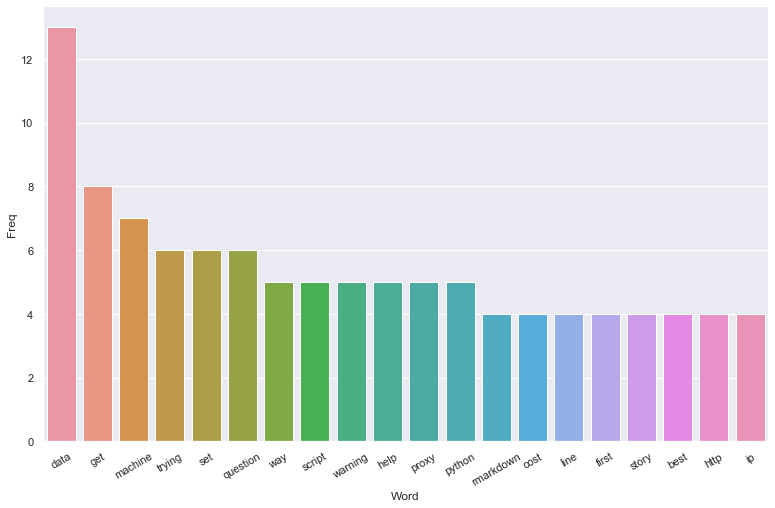

In [84]:
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

[Text(0, 0, 'equip cost'),
 Text(0, 0, 'cost machine'),
 Text(0, 0, 'set config'),
 Text(0, 0, 'run script'),
 Text(0, 0, 'script rmarkdown'),
 Text(0, 0, 'machine cheap'),
 Text(0, 0, 'machine costly'),
 Text(0, 0, 'machine range'),
 Text(0, 0, 'trying get'),
 Text(0, 0, 'data reporter'),
 Text(0, 0, 'within environment'),
 Text(0, 0, 'get started'),
 Text(0, 0, 'corwin emily'),
 Text(0, 0, 'hi easy'),
 Text(0, 0, 'easy way'),
 Text(0, 0, 'way filter'),
 Text(0, 0, 'filter large'),
 Text(0, 0, 'large spreadsheet'),
 Text(0, 0, 'spreadsheet item'),
 Text(0, 0, 'item rather')]

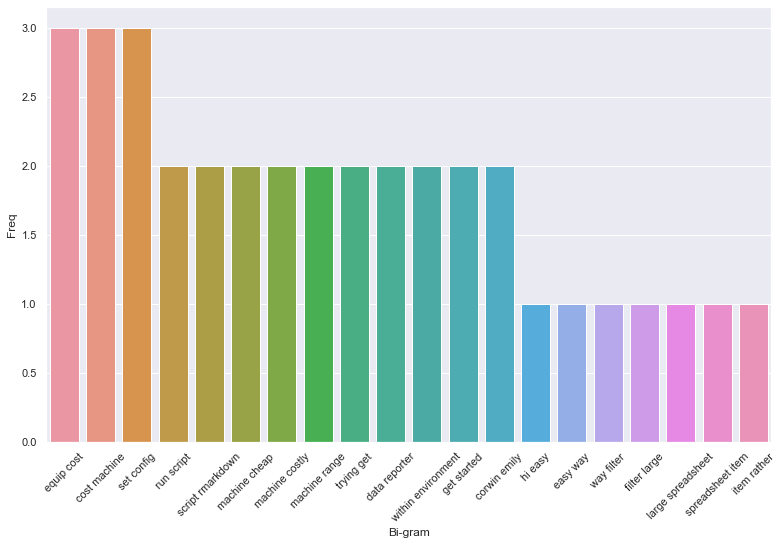

In [85]:
# most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

top2_words = get_top_n2_words(corpus, n=20)
top2_df = pandas.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
# print(top2_df)

# barplot of most freq Bi-grams
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

[Text(0, 0, 'equip cost machine'),
 Text(0, 0, 'run script rmarkdown'),
 Text(0, 0, 'hi easy way'),
 Text(0, 0, 'easy way filter'),
 Text(0, 0, 'way filter large'),
 Text(0, 0, 'filter large spreadsheet'),
 Text(0, 0, 'large spreadsheet item'),
 Text(0, 0, 'spreadsheet item rather'),
 Text(0, 0, 'item rather smaller'),
 Text(0, 0, 'rather smaller subset'),
 Text(0, 0, 'running problem summarizing'),
 Text(0, 0, 'problem summarizing federal'),
 Text(0, 0, 'summarizing federal data'),
 Text(0, 0, 'federal data rmarkdown'),
 Text(0, 0, 'data rmarkdown data'),
 Text(0, 0, 'rmarkdown data missing'),
 Text(0, 0, 'data missing coded'),
 Text(0, 0, 'missing coded work'),
 Text(0, 0, 'coded work script'),
 Text(0, 0, 'work script console')]

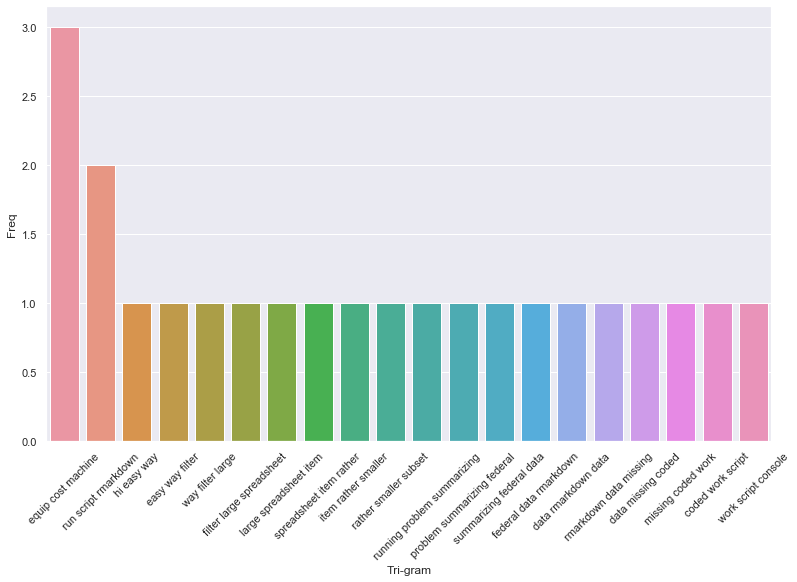

In [86]:
# most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

top3_words = get_top_n3_words(corpus, n=20)
top3_df = pandas.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
# print(top3_df)
      
# barplot of most freq Tri-grams
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

In [87]:
# converting to a matrix of integers to highlight words that are more important to the context
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)# get feature names
feature_names=cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
doc=corpus[1]
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

In [88]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix

def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,5)
 
# now print the results
print("\nEmail content:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Email content:
running problem summarizing federal data rmarkdown data missing coded work script console try run script rmarkdown get long error message example widget group state county summarize machine cheap min equip cost machine median median equip cost machine costly max equip cost machine range machine costly machine cheap arrange desc machine range head work fine console script line note saying warning warning say non missing argument min returning inf um okay run script rmarkdown instead polite one line suggestion look first warning get warning lot paging get line result asked script tried using warning false command top rmarkdown document place document effect idea

Keywords:
machine 0.328
warning 0.234
script 0.234
rmarkdown 0.188
equip cost machine 0.141
